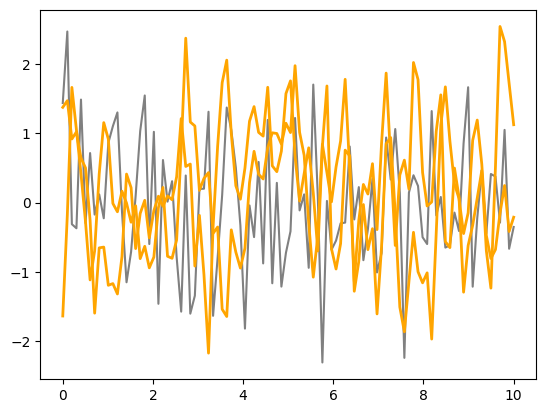

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(0, 10, 100)

f_norm = stats.norm.rvs(loc=0, scale=1, size=100) # mean 0, stdev 1

plt.plot(x, f_norm, color='gray')

def exp_quad_kernel(x, knots, length=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*length**2)) for k in knots])

cov = exp_quad_kernel(x, x, 0.1)  # Change hte parameter from 0.1 to 10
f_mvn = stats.multivariate_normal.rvs(cov=cov, size=2).T
plt.plot(x, f_mvn, color="orange", linewidth=2)

plt.show()

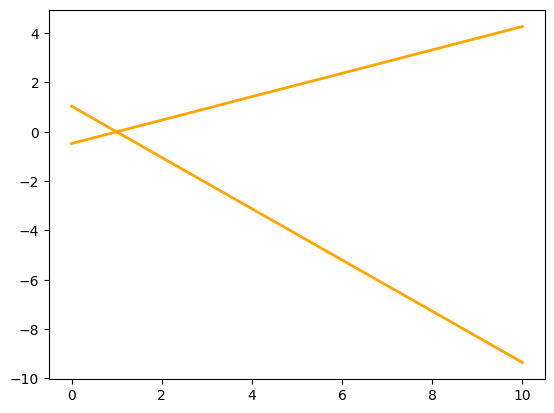

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(0, 10, 100)


def linear_kernel(x1, x2, c=0, sd_a=1, sd_b=1):
    return sd_a + sd_b * np.outer(x1 - c, x2 - c)

cov = linear_kernel(x, x, c=1, sd_a=0, sd_b=1)
f_mvn = stats.multivariate_normal.rvs(cov=cov, size=2).T
plt.plot(x, f_mvn, color="orange", linewidth=2)

plt.show()

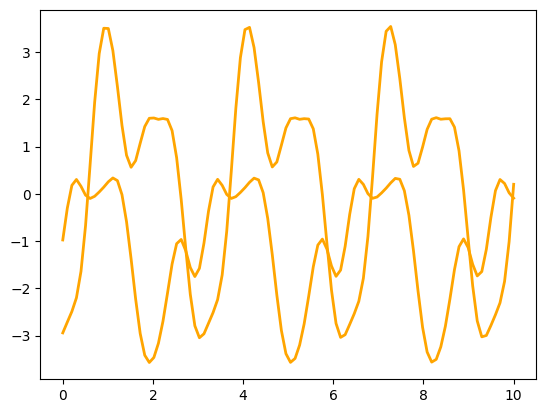

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.linspace(0, 10, 100)


def periodic_kernel(a, b, theta_1=1.5, theta_2=0.5):
    A = np.repeat(a, len(a)).reshape(len(a), len(a))
    B = np.repeat(b, len(b)).reshape(len(b), len(b)).T
    X = np.abs(A - B)
    X /= theta_2
    X = np.cos(X)
    X *= theta_1
    return np.exp(X)


cov = periodic_kernel(x, x)
f_mvn = stats.multivariate_normal.rvs(cov=cov, size=2).T
plt.plot(x, f_mvn, color="orange", linewidth=2)

plt.show()